In [1]:
import os
import csv
import os.path
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

df = pd.read_csv("C:/Users/olowe_m/OneDrive/DA Material/Case Study 1/Data/cyclistic_data.csv")
df.info()
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479096 entries, 0 to 5479095
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   ride_id             object 
 2   rideable_type       object 
 3   started_at          object 
 4   ended_at            object 
 5   start_station_name  object 
 6   start_station_id    object 
 7   end_station_name    object 
 8   end_station_id      object 
 9   start_lat           float64
 10  start_lng           float64
 11  end_lat             float64
 12  end_lng             float64
 13  member_casual       object 
dtypes: float64(4), int64(1), object(9)
memory usage: 585.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479096 entries, 0 to 5479095
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at    

In [2]:
df.dropna(inplace=True)
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4525842 entries, 0 to 5479085
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 483.4+ MB


In [3]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['hour'] = df['started_at'].dt.hour
df['ord_day'] = df['started_at'].dt.dayofyear
df['week_day'] = df['started_at'].dt.dayofweek
df['month'] = df['started_at'].dt.month
df['ride_minutes'] = (df['ended_at'] - df['started_at'])
df['ride_minutes'] = pd.to_numeric(df['ride_minutes']) / 6e+10

df.replace({'rideable_type': {'classic_bike': 0, 'electric_bike': 1, 'docked_bike': 2}}, inplace=True)
df['rideable_type'] = df['rideable_type'].astype('int8')
df['ride_minutes'] = df['ride_minutes'].astype('float32')
df['month'] = df['month'].astype('int8')
df['ord_day'] = df['ord_day'].astype('int16')
df['hour'] = df['hour'].astype('int8')
df['week_day'] = df['week_day'].astype('int8')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4525842 entries, 0 to 5479085
Data columns (total 18 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       int8          
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  hour                int8          
 14  ord_day             int16         
 15  week_day            int8          
 16  month               int8          
 17  ride_minutes        float32       
dtypes: datetime64[ns](2), float32(1), float64(4), int16(1), int8(4), object(6)
memory 

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,hour,ord_day,week_day,month,ride_minutes
0,70B6A9A437D4C30D,0,2020-12-27 12:44:29,2020-12-27 12:55:06,Aberdeen St & Jackson Blvd,13157,Desplaines St & Kinzie St,TA1306000003,41.877726,-87.654787,41.888716,-87.644448,member,12,362,6,12,10.616667
39,15F369FDAED4E8E3,1,2020-12-18 13:53:56,2020-12-18 14:01:46,Larrabee St & Armitage Ave,TA1309000006,Wells St & Walton St,TA1306000011,41.918112,-87.643799,41.900129,-87.634448,member,13,353,4,12,7.833333
50,0CFD61DFE00E6043,1,2020-12-28 17:10:25,2020-12-28 17:12:13,Kingsbury St & Kinzie St,KA1503000043,Desplaines St & Kinzie St,TA1306000003,41.889193,-87.638576,41.889099,-87.642479,member,17,363,0,12,1.800000
87,244CB936487039B7,2,2020-12-10 13:36:16,2020-12-10 14:37:03,Clark St & Leland Ave,TA1309000014,Clark St & Leland Ave,TA1309000014,41.967096,-87.667429,41.967096,-87.667429,casual,13,345,3,12,60.783333
88,B7AD5038F79637F9,0,2020-12-20 13:09:04,2020-12-20 13:15:08,Dearborn St & Monroe St,TA1305000006,Kingsbury St & Kinzie St,KA1503000043,41.881320,-87.629521,41.889177,-87.638506,member,13,355,6,12,6.066667


In [4]:
df.replace({'member_casual': {'member': True, 'casual': False}}, inplace=True)
casuals = df[df['member_casual']==False]
members = df[df['member_casual']==True]
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4525842 entries, 0 to 5479085
Data columns (total 18 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       int8          
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       bool          
 13  hour                int8          
 14  ord_day             int16         
 15  week_day            int8          
 16  month               int8          
 17  ride_minutes        float32       
dtypes: bool(1), datetime64[ns](2), float32(1), float64(4), int16(1), int8(4), object(5

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,hour,ord_day,week_day,month,ride_minutes
0,70B6A9A437D4C30D,0,2020-12-27 12:44:29,2020-12-27 12:55:06,Aberdeen St & Jackson Blvd,13157,Desplaines St & Kinzie St,TA1306000003,41.877726,-87.654787,41.888716,-87.644448,True,12,362,6,12,10.616667
39,15F369FDAED4E8E3,1,2020-12-18 13:53:56,2020-12-18 14:01:46,Larrabee St & Armitage Ave,TA1309000006,Wells St & Walton St,TA1306000011,41.918112,-87.643799,41.900129,-87.634448,True,13,353,4,12,7.833333
50,0CFD61DFE00E6043,1,2020-12-28 17:10:25,2020-12-28 17:12:13,Kingsbury St & Kinzie St,KA1503000043,Desplaines St & Kinzie St,TA1306000003,41.889193,-87.638576,41.889099,-87.642479,True,17,363,0,12,1.800000
87,244CB936487039B7,2,2020-12-10 13:36:16,2020-12-10 14:37:03,Clark St & Leland Ave,TA1309000014,Clark St & Leland Ave,TA1309000014,41.967096,-87.667429,41.967096,-87.667429,False,13,345,3,12,60.783333
88,B7AD5038F79637F9,0,2020-12-20 13:09:04,2020-12-20 13:15:08,Dearborn St & Monroe St,TA1305000006,Kingsbury St & Kinzie St,KA1503000043,41.881320,-87.629521,41.889177,-87.638506,True,13,355,6,12,6.066667
129,E6062981952CE78F,2,2020-12-03 21:06:25,2020-12-03 21:43:18,Sheridan Rd & Noyes St (NU),604,Sheridan Rd & Noyes St (NU),604,42.058239,-87.677432,42.058239,-87.677432,True,21,338,3,12,36.883335
130,7BD56E5E5328A177,2,2020-12-02 22:22:56,2020-12-02 22:58:07,Sheridan Rd & Noyes St (NU),604,Sheridan Rd & Noyes St (NU),604,42.058239,-87.677432,42.058239,-87.677432,True,22,337,2,12,35.183334
131,9E032790F2FAD2D8,2,2020-12-04 09:23:34,2020-12-04 10:09:02,Clark St & Leland Ave,TA1309000014,Clark St & Leland Ave,TA1309000014,41.967096,-87.667429,41.967096,-87.667429,False,9,339,4,12,45.466667
132,890F28445C88F628,2,2020-12-27 14:42:25,2020-12-27 15:23:23,Clark St & Leland Ave,TA1309000014,Clark St & Leland Ave,TA1309000014,41.967096,-87.667429,41.967096,-87.667429,False,14,362,6,12,40.966667
133,9B7CF13F07605039,2,2020-12-19 15:19:50,2020-12-19 15:53:50,Michigan Ave & Oak St,13042,Michigan Ave & Oak St,13042,41.900960,-87.623777,41.900960,-87.623777,False,15,354,5,12,34.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4461900 entries, 0 to 5479085
Data columns (total 18 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       int8          
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       bool          
 13  hour                int8          
 14  ord_day             int16         
 15  week_day            int8          
 16  month               int8          
 17  ride_minutes        float32       
dtypes: bool(1), datetime64[ns](2), float32(1), float64(4), int16(1), int8(4), object(5

<AxesSubplot:xlabel='ride_minutes'>

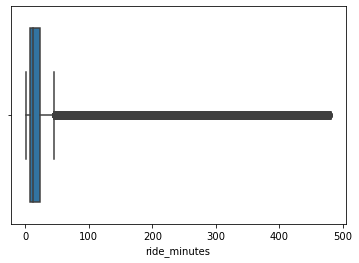

In [5]:
df.drop(df[df['ride_minutes'] < 1].index, inplace=True)
df.drop(df[df['ride_minutes'] > 480].index, inplace=True)
df.info()
sns.boxplot(x='ride_minutes', data= df)

<Figure size 576x432 with 0 Axes>

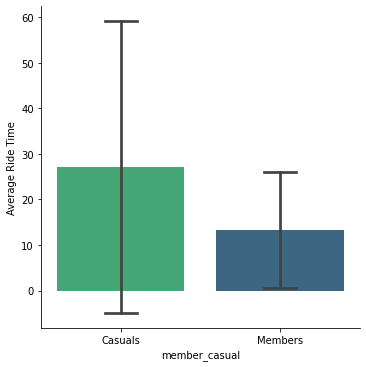

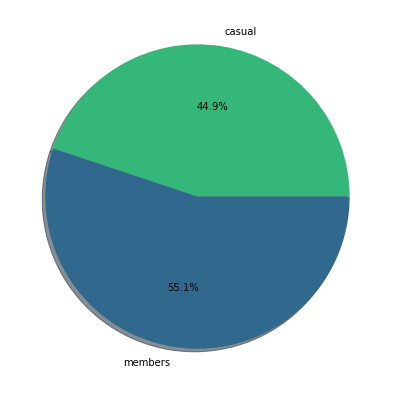

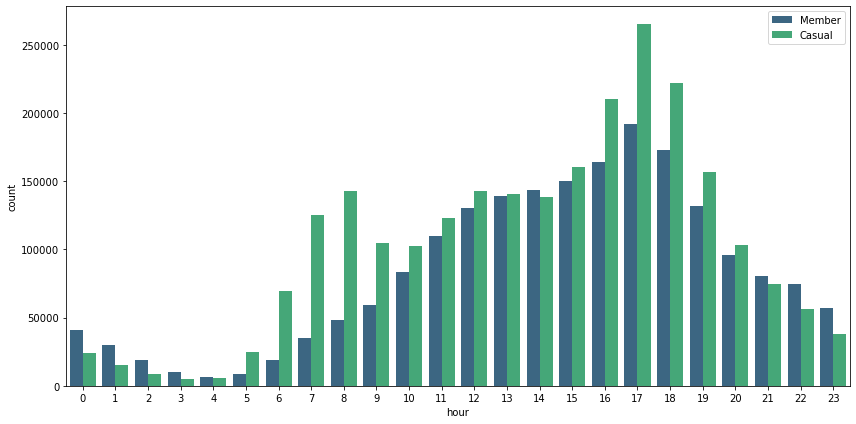

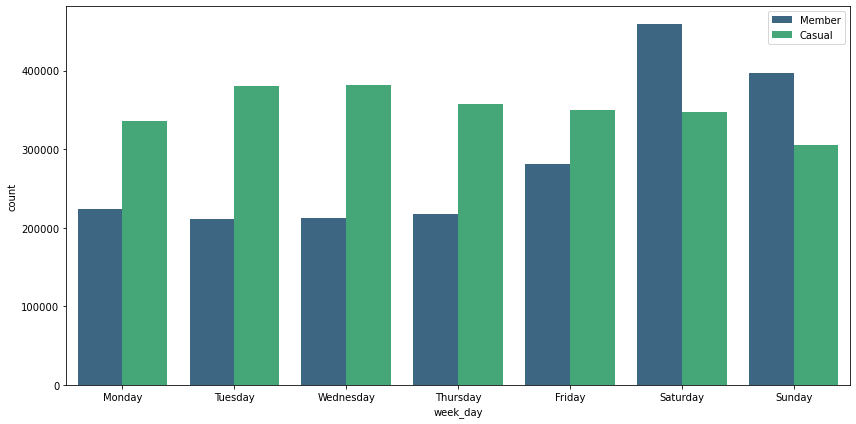

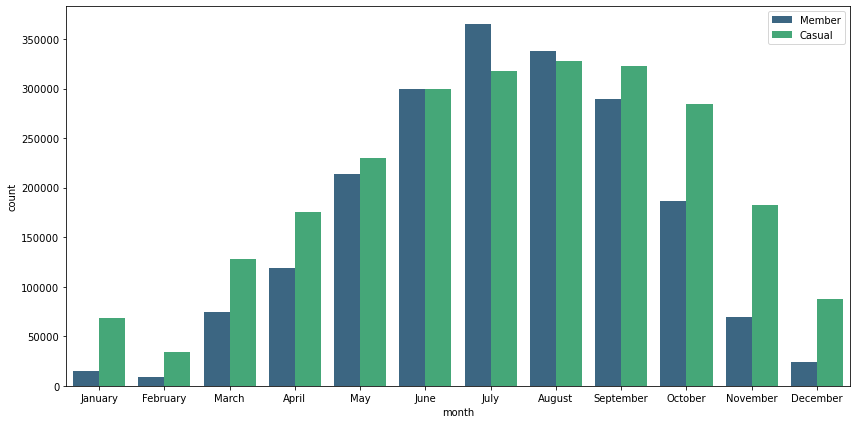

In [6]:
plt.figure(figsize=(8,6))
g = sns.catplot(x='member_casual', y='ride_minutes', data=df,kind="bar", palette=sns.color_palette(['#35b779','#31688e']), ci="sd", capsize=.2)
g.set_ylabels("Average Ride Time")
g.set(xticklabels=["Casuals", "Members"])

member_type = df.groupby('member_casual').agg('count')
fig = plt.figure(figsize =(10, 7))
colors = ("#35b779","#31688e")
plt.pie(member_type.ride_id, labels = ('casual','members'), autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(x='hour', hue='member_casual', data=df, palette='viridis')
plt.legend(['Member', 'Casual'])
plt.tight_layout()

plt.figure(figsize=(12,6))
sns.countplot(x='week_day', hue='member_casual', data=df, palette='viridis')
plt.xticks([0,1,2,3,4,5,6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend(['Member', 'Casual'])
plt.tight_layout()

plt.figure(figsize=(12,6))
sns.countplot(x='month', hue='member_casual', data=df, palette='viridis')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December'])
plt.legend(['Member', 'Casual'])
plt.tight_layout()

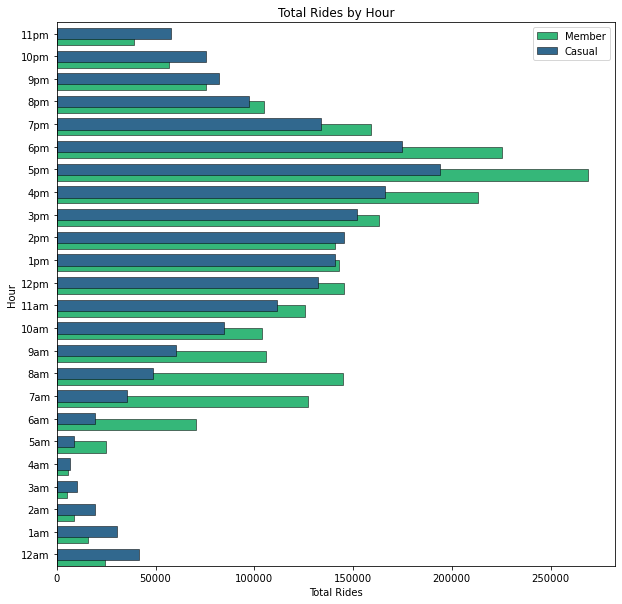

In [7]:
plt.figure(figsize=(10,10))
members['hour'].value_counts().sort_index().plot.barh(color='#35b779', align='edge', width=-.5, linewidth=.5, edgecolor='k')
casuals['hour'].value_counts().sort_index().plot.barh(color='#31688e', align='center', width=.5, linewidth=.5, edgecolor='k')
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], 
           ['12am','1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm'], rotation=0)
plt.xlabel('Total Rides')
plt.ylabel('Hour')
plt.title('Total Rides by Hour')
plt.legend(['Member', 'Casual'])
plt.show()

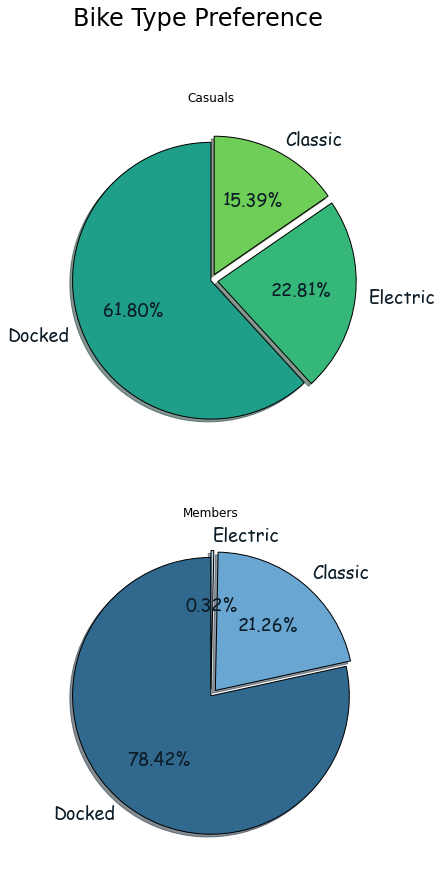

In [8]:
fig, (cas_type, mem_type) = plt.subplots(2,1, figsize=(14,14))
fig.suptitle('Bike Type Preference', fontsize=24)

cas_type.pie(casuals['rideable_type'].value_counts(normalize=True),
        colors=['#1f9e89','#35b779','#6ece58'],
        labels=['Docked','Electric','Classic'],
        shadow=True, explode=[0, 0.05, 0.05], startangle=90, 
        wedgeprops={'edgecolor':'black', 'linewidth':1},
        textprops={'size':18, 'color':'#0c1c27', 'family':'fantasy'},
       autopct='%1.2f%%')
cas_type.title.set_text('Casuals')

mem_type.pie(members['rideable_type'].value_counts(normalize=True),
        colors=['#31688e','#69a6d1','#b1d1e7'],
        labels=['Docked','Classic','Electric'],
        shadow=True, explode=[0, 0.05, 0.05], startangle=90, 
        wedgeprops={'edgecolor':'black', 'linewidth':1},
        textprops={'size':18, 'color':'#0c1c27', 'family':'fantasy'},
       autopct='%1.2f%%')
mem_type.title.set_text('Members')

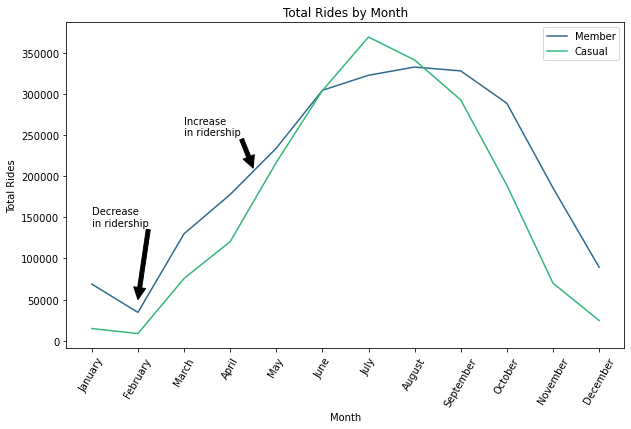

In [9]:
plt.figure(figsize=(10,6))
members['month'].value_counts().sort_index().plot(color='#31688e')
casuals['month'].value_counts().sort_index().plot(color='#35b779')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],
           ['January','February','March','April','May','June','July','August','September','October','November','December'],
           rotation=60)
plt.xlabel('Month')
plt.ylabel('Total Rides')
plt.title('Total Rides by Month')
plt.legend(['Member', 'Casual'])
plt.annotate('Decrease\nin ridership',
             xy=(2,50000), xycoords='data', xytext=(1,140000),
            arrowprops={'facecolor': 'black'})
plt.annotate('Increase\nin ridership',
             xy=(4.5,210000), xycoords='data', xytext=(3,250000),
            arrowprops={'facecolor': 'black'})
plt.show()

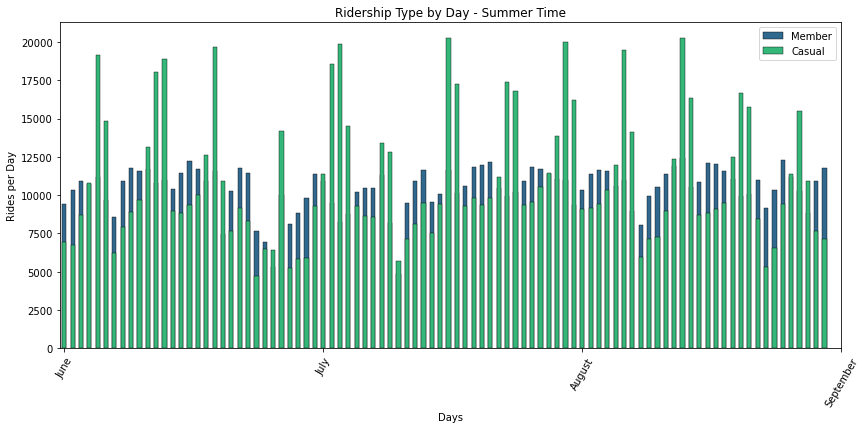

<ipython-input-10-49e0a6de47e4>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casual_winterny_rides['ord_day'] = casual_winterny_rides['ord_day']+366
<ipython-input-10-49e0a6de47e4>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member_winterny_rides['ord_day'] = member_winterny_rides['ord_day']+366


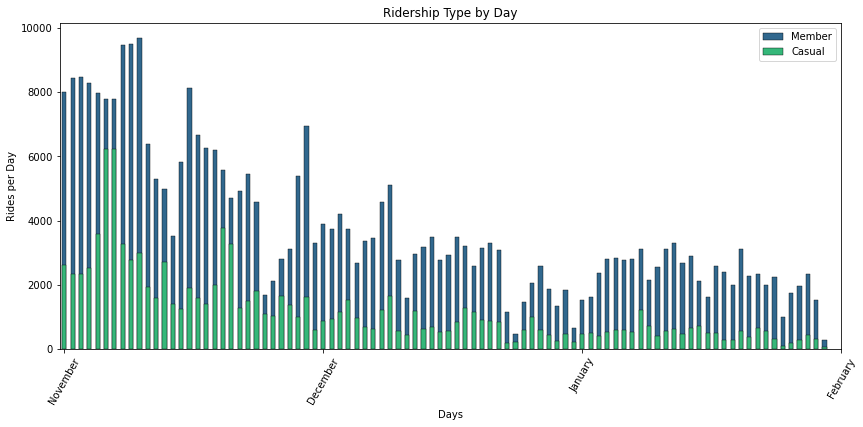

In [10]:
# creating Series objects where 'month' is May, June, or July
casual_summer_days = pd.Series((casuals['month'] >= 6) & (casuals['month'] <= 8))
member_summer_days = pd.Series((members['month'] >= 6) & (members['month'] <= 8))

# filtering membership type by our aformentioned Series
casual_summer_rides = casuals.loc[casual_summer_days]
member_summer_rides = members.loc[member_summer_days]

plt.figure(figsize=(14,6))
member_summer_rides['ord_day'].value_counts().sort_index().plot(kind='bar', color='#31688e', linewidth=.4, edgecolor='k')
casual_summer_rides['ord_day'].value_counts().sort_index().plot(kind='bar', color='#35b779', linewidth=.4, edgecolor='k')
plt.xticks([0, 31, 62, 93],['June','July', 'August', 'September'], rotation=60)
plt.xlabel('Days')
plt.ylabel('Rides per Day')
plt.title('Ridership Type by Day - Summer Time')
plt.legend(['Member', 'Casual'])
plt.show()

# creating Series objects where 'month' is Dec, Jan, or Feb
casual_winter_days = pd.Series((casuals['month'] >= 11) & (casuals['month'] <= 12))
member_winter_days = pd.Series((members['month'] >= 11) & (members['month'] <= 12))
casual_winterny_days = pd.Series((casuals['month'] >= 1) & (casuals['month'] <= 1))
member_winterny_days = pd.Series((members['month'] >= 1) & (members['month'] <= 1))

# filtering membership type by our aformentioned Series
casual_winter_rides = casuals.loc[casual_winter_days]
member_winter_rides = members.loc[member_winter_days]
casual_winterny_rides = casuals.loc[casual_winterny_days]
member_winterny_rides = members.loc[member_winterny_days]

#Reorder dataset
casual_winterny_rides['ord_day'] = casual_winterny_rides['ord_day']+366
member_winterny_rides['ord_day'] = member_winterny_rides['ord_day']+366

#Concate new winter data set
totcasual_winter_rides = pd.concat([casual_winter_rides, casual_winterny_rides])
totmember_winter_rides = pd.concat([member_winter_rides, member_winterny_rides])

#Plot barchart winter dataset
plt.figure(figsize=(14,6))
totmember_winter_rides['ord_day'].value_counts().sort_index().plot(kind='bar', color='#31688e', linewidth=.4, edgecolor='k')
totcasual_winter_rides['ord_day'].value_counts().sort_index().plot(kind='bar', color='#35b779', linewidth=.4, edgecolor='k')
plt.xticks([0, 31, 62, 93],['November','December','January', 'February'], rotation=60)
plt.xlabel('Days')
plt.ylabel('Rides per Day')
plt.title('Ridership Type by Day')
plt.legend(['Member', 'Casual'])
plt.show()

In [11]:
#Most and Least docking station locations for bikes
x_start = df['start_station_name'].value_counts().head(10)
print(x_start)
 
y_start = df['start_station_name'].value_counts().tail(20)
print(y_start)

x_end = df['end_station_name'].value_counts().head(10)
print(x_end)

y_end = df['end_station_name'].value_counts().tail(20)
print(y_end)

Streeter Dr & Grand Ave     78152
Michigan Ave & Oak St       41938
Wells St & Concord Ln       40609
Millennium Park             39252
Clark St & Elm St           38680
Theater on the Lake         35370
Wells St & Elm St           35148
Clark St & Lincoln Ave      31373
Kingsbury St & Kinzie St    30921
Clark St & Armitage Ave     30890
Name: start_station_name, dtype: int64
Elston Ave & Henderson St                 3
WEST CHI-WATSON                           3
California Ave & Marquette Rd             3
Hamlin Ave & 62nd Pl                      3
Augusta Blvd & Laramie Ave                2
Pulaski & Ann Lurie Pl                    1
Kildare Ave & 47th St                     1
HUBBARD ST BIKE CHECKING (LBS-WH-TEST)    1
Sacramento Ave & 25th St                  1
St Louis Ave & 59th St                    1
351                                       1
Lyft Driver Center Private Rack           1
Sacramento Blvd & Polk St                 1
Western Ave & Ardmore Ave                 1
India

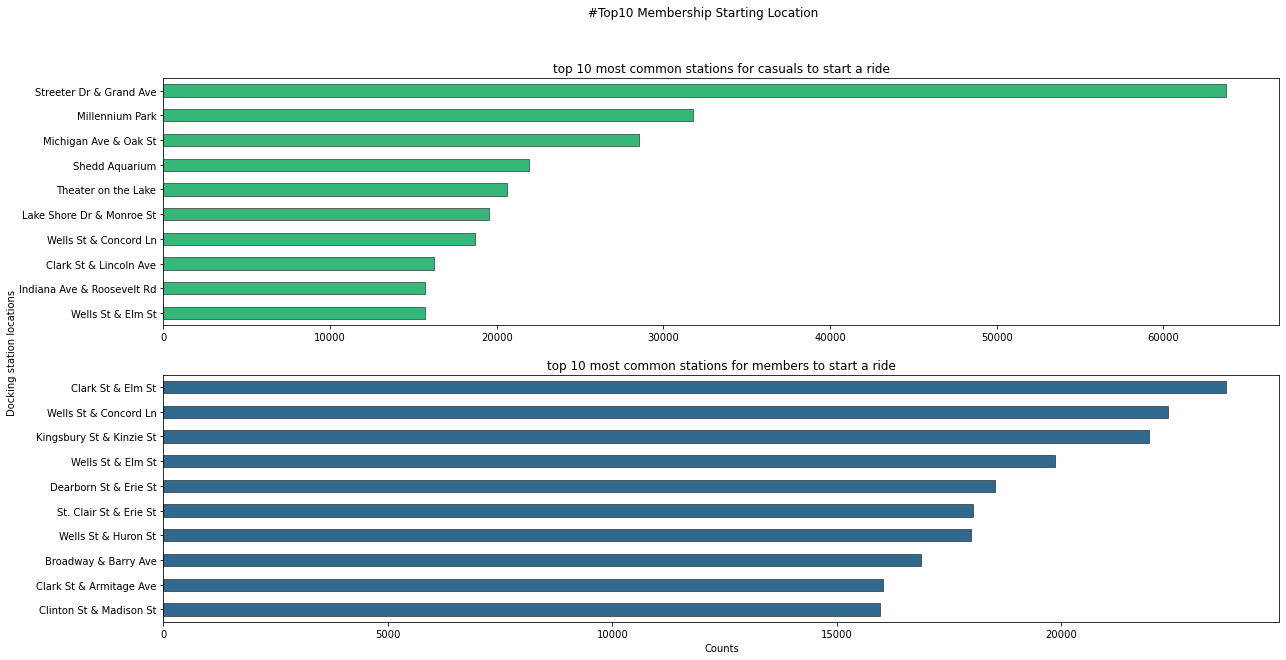

In [12]:
fig, axs = plt.subplots(2, 1, figsize=(20, 10))

fig.suptitle('#Top10 Membership Starting Location')

casuals['start_station_name'].value_counts().head(10).sort_values().plot.barh(color='#35b779', align='center', width=.5, linewidth=.5, edgecolor='k', ax=axs[0])
members['start_station_name'].value_counts().head(10).sort_values().plot.barh(color='#31688e', align='center', width=.5, linewidth=.5, edgecolor='k', ax=axs[1])
plt.xlabel('Counts')
axs[0].set_title('top 10 most common stations for casuals to start a ride')
axs[1].set_title('top 10 most common stations for members to start a ride')
fig.text(0.02, 0.5, 'Docking station locations', ha='center', va='center', rotation='vertical')
plt.show()

In [13]:
geo_data = df[["member_casual","start_lat", "start_lng","end_lat", "end_lng"]]
casuals = geo_data[geo_data['member_casual']==False]
members = geo_data[geo_data['member_casual']==True]
mask = geo_data.applymap(type) != bool
d = {True: 'members', False: 'casuals'}
geo_data = geo_data.where(mask, geo_data.replace(d))
geo_data.head(20)
geo_data = geo_data.round(2)

(739, 1801, 4)


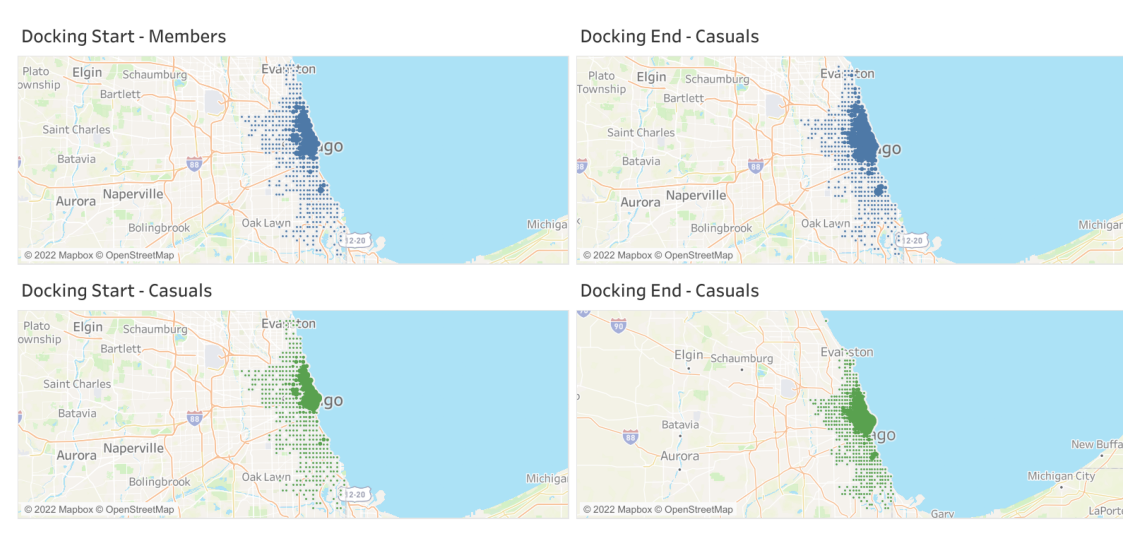

In [14]:
from matplotlib import image
plt.figure(figsize=(20,20))
img = image.imread("geo_map.png")
plt.imshow(img)

# crop image
img_cropped = img[0:4000, 0:1580]
plt.axis('off')
# confirm cropped image shape
print(img.shape)
plt.imshow(img_cropped)
plt.show()

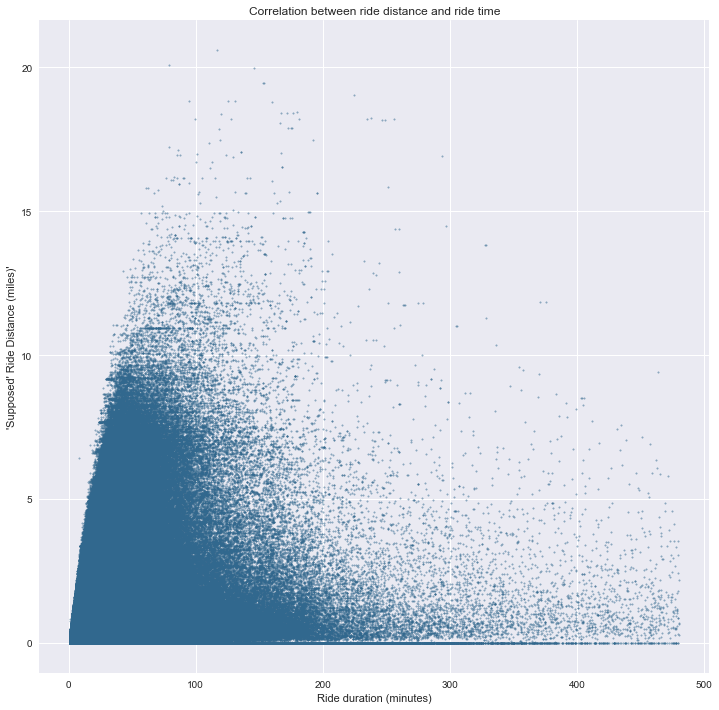

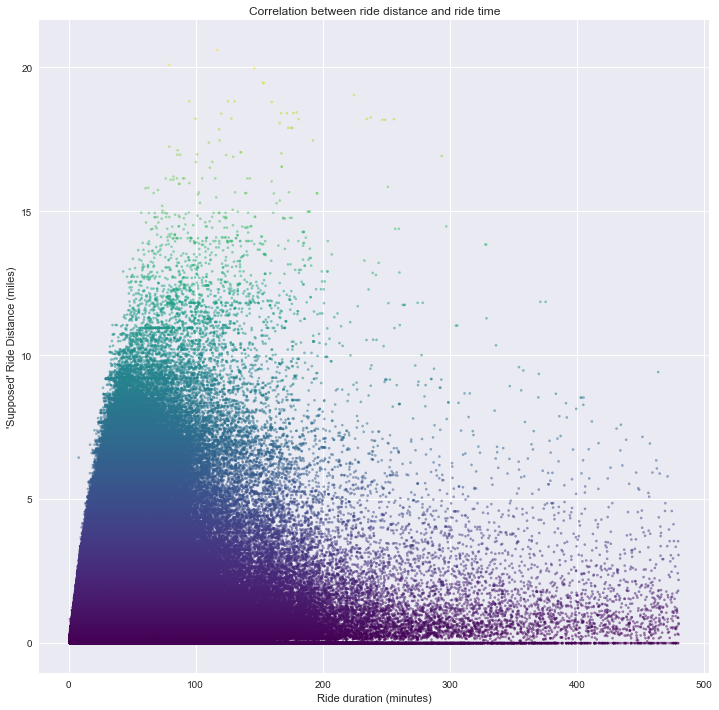

In [15]:
plt.figure(figsize=(12,12))
df['ride_dist_miles'] = np.sqrt( ((df['end_lat'] - df['start_lat'])**2) + ((df['end_lng'] - df['start_lng'])**2) )
    # formula for distance between two coordinates:
    # sqrt( (x2-x1)^2 + (y2-y1)^2 ) 
df['ride_dist_miles'] = df['ride_dist_miles'] * 68.931
    # 111 is an approximate factor for converting degrees of lat/long seperation into miles
plt.style.use('seaborn')
plt.scatter(df.ride_minutes, df.ride_dist_miles,s=10,color='#31688e',cmap='viridis',alpha=0.5,marker='.')
plt.ylabel("'Supposed' Ride Distance (miles)'")
plt.xlabel("Ride duration (minutes)")
plt.title("Correlation between ride distance and ride time")
plt.show()

plt.figure(figsize=(12,12))
c = df['ride_dist_miles']
plt.style.use('seaborn')
plt.scatter(df.ride_minutes, df.ride_dist_miles,c=c,s=20,cmap='viridis',alpha=0.5,marker='.')
plt.ylabel("'Supposed' Ride Distance (miles)")
plt.xlabel("Ride duration (minutes)")
plt.title("Correlation between ride distance and ride time")
plt.show()

In [16]:
#Most popular trips
pop_jou = df.groupby(['start_station_name','end_station_name']).size().reset_index().rename(columns={0:'count'}).sort_values(by='count',ascending=False)
pop_jou.head(10)

,start_station_name,end_station_name,count
133365,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,11792
95900,Michigan Ave & Oak St,Michigan Ave & Oak St,6066
97993,Millennium Park,Millennium Park,5919
78101,Lake Shore Dr & Monroe St,Lake Shore Dr & Monroe St,4983
53876,Ellis Ave & 60th St,Ellis Ave & 55th St,4939
53592,Ellis Ave & 55th St,Ellis Ave & 60th St,4469
134098,Theater on the Lake,Theater on the Lake,3580
133251,Streeter Dr & Grand Ave,Millennium Park,3541
99899,Montrose Harbor,Montrose Harbor,3504
13125,Buckingham Fountain,Buckingham Fountain,3379
